In [6]:
from pandapower.plotting import simple_plot
import pandapower as pp
import copy
import numpy as np
from tqdm import tqdm
import random

No or insufficient geodata available --> Creating artificial coordinates. This may take some time


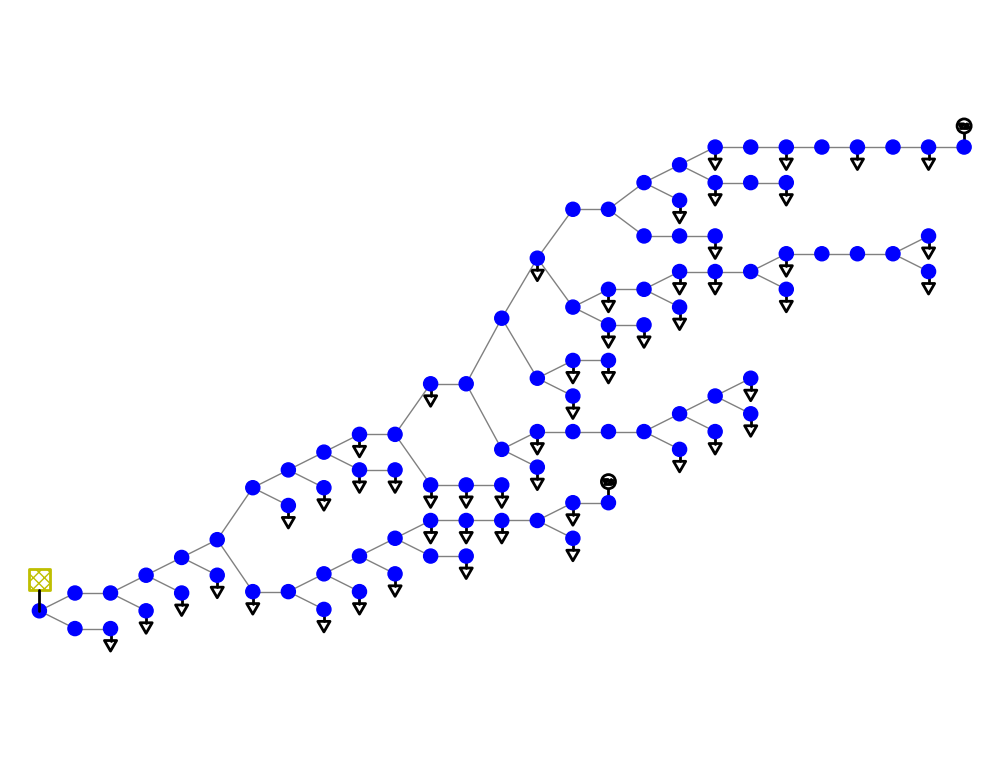

This pandapower network includes the following parameter tables:
   - bus (95 element)
   - load (51 element)
   - sgen (2 element)
   - ext_grid (1 elements)
   - line (94 element)
   - bus_geodata (95 element)


In [7]:
def Network_95_nodes_data():
    net = pp.create_empty_network(name="95bus_grid")
    pp.create_buses(net, 95, 11, min_vm_pu=0.95, max_vm_pu=1.05)
    pp.create_ext_grid(net, 0)
    idx = [2,5,7,9,11,13,15,17,20,21,22,23,25,26,29,31,33,34,35,37,38,39,40,43,44,48,50,52,53,56,57,58,59,61,62,63,65,66,67,69,70,74,75,80,82,84,86,87,89,91,93]
    P = [0.82092, 0.021915, 0.04569, 0.042075, 0.007305, 0.007305, 0.023535, 0.01974, 0.08631, 0.085875, 0.041655,
         0.0438, 0.02196, 0.679290434, 0.03948, 0.027465, 0.07245, 0.051105, 0.07777, 0.084075, 0.17601, 0.010995,
         0.01647, 0.047505, 0.15264, 0.021915, 0.02343, 0.07167, 0.08493, 0.011685, 0.01876, 0.010995, 0.041655,
         0.021915, 0.021915, 0.026745, 0.12681, 0.0438, 0.04101, 0.051105, 0.020445, 0.21266, 0.15078, 0.080385,
         0.0375, 0.12867, 0.14547, 0.068445, 0.199155, 0.08415, 0.07209]
    Q = [0.14346, 0.00312, 0.00651, 0.006, 0.001035, 0.001035, 0.00774, 0.00336, 0.014535, 0.012255, 0.00648, 0.00624,
         0.003135, 0.01005, 0.006735, 0.003915, 0.01143, 0.00729, 0.00648, 0.01799, 0.041745, 0.00156, 0.00234,
         0.006765, 0.029, 0.00312, 0.003885, 0.03451, 0.012945, 0.03111, 0.00186, 0.00156, 0.02432, 0.00312, 0.00312,
         0.00492, 0.02381, 0.00624, 0.015, 0.00729, 0.00594, 0.01181, 0.01473, 0.01764, 0.0075, 0.028455, 0.02184,
         0.015, 0.037275, 0.011985, 0.01194]
    pp.create_loads(net, idx, p_mw=P, q_mvar=Q)
    idx = [27, 94]
    P = [1.0125, 1.4625]
    #Q = [-0.33285, -0.33285]
    Q = [-0.33285, -0.33285]
    pp.create_sgens(net, idx, P, Q)
    fbus = [0, 1, 0, 3, 4, 4, 6, 6, 8, 8, 10, 11, 12, 12, 14, 14, 16, 16, 18, 19,
          18, 21, 22, 23, 24, 24, 26, 10, 28, 28, 30, 30, 32, 33, 32, 35, 36, 37, 38, 36,
          40, 41, 42, 42, 44, 45, 46, 47, 47, 49, 49, 51, 51, 41, 54, 55, 55, 57, 54, 59,
          60, 61, 60, 63, 64, 64, 66, 67, 68, 68, 70, 71, 72, 73, 73, 59, 76, 77, 78, 79,
          77, 81, 81, 83, 84, 85, 83, 87, 88, 89, 90, 91, 92, 93]
    tbus = list(range(1, 95))
    length_km = 1
    R = [0.05489, 0.03881, 0.04879, 0.09755, 0.17322, 0.21, 0.24251, 0.2586, 0.34645, 0.1293, 0.30169, 0.19395,
     0.17322, 0.23705, 0.20787, 0.2586, 0.13858, 0.1293, 0.1724, 0.10775, 0.2155, 0.19395, 0.30169, 0.09,
     0.13161, 0.36, 0.12, 0.295, 0.20787, 0.354, 0.24251, 0.27716, 0.2586, 0.3118, 0.11149, 0.34612, 0.15608,
     0.22298, 0.2135, 0.34479, 0.1293, 0.118, 0.20787, 0.236, 0.177, 0.09401, 0.177, 0.236, 0.354, 0.354,
     0.27716, 0.2135, 0.53374, 0.1724, 0.20787, 0.27716, 0.41574, 0.27716, 0.30169, 0.36517, 0.17322, 0.3118,
     0.14607, 0.25562, 0.20787, 0.18258, 0.29213, 0.25562, 0.09401, 0.4382, 0.2191, 0.07521, 0.14607, 0.29213,
     0.40168, 0.2586, 0.1293, 0.18258, 0.29213, 0.4382, 0.2155, 0.1293, 0.19395, 0.27716, 0.48502, 0.22621,
     0.2586, 0.06465, 0.27244, 0.16346, 0.0862, 0.15085, 0.27244, 0.49039]
    X = [0.0569, 0.104, 0.05058, 0.33284, 0.07589, 0.203, 0.10624, 0.17673, 0.15178, 0.08836, 0.20618, 0.13255,
     0.07589, 0.172, 0.09107, 0.17673, 0.06071, 0.08836, 0.11782, 0.07364, 0.14727, 0.13255, 0.20618, 0.087,
     0.05033, 0.348, 0.116, 0.15, 0.09107, 0.18, 0.10624, 0.12142, 0.17673, 0.1366, 0.07376, 0.20653, 0.10326,
     0.14752, 0.09126, 0.23564, 0.08836, 0.06, 0.09107, 0.12, 0.09, 0.03595, 0.09, 0.12, 0.18, 0.18, 0.12142,
     0.09126, 0.22816, 0.11782, 0.09107, 0.12142, 0.18213, 0.12142, 0.20618, 0.15244, 0.07589, 0.1366, 0.06098,
     0.10671, 0.09107, 0.07622, 0.12195, 0.10671, 0.03595, 0.18293, 0.09146, 0.02876, 0.06098, 0.12195, 0.16768,
     0.17673, 0.08836, 0.07622, 0.12195, 0.17673, 0.14727, 0.08836, 0.13255, 0.12142, 0.21249, 0.04686, 0.17673,
     0.04418, 0.04012, 0.02407, 0.05891, 0.10309, 0.04012, 0.07222]
    R = [k * 1.21 for k in R]
    X = [k * 1.21 for k in X]
    C = 0
    Imax = 0
    pp.create_lines_from_parameters(net, fbus, tbus, length_km, R, X, C, Imax)
    return net

net = Network_95_nodes_data()

simple_plot(net, plot_sgens=True, plot_loads=True)
print(net)

In [ ]:
%%time

def generate_numbers(time_instants, n_bus):
    res = np.zeros((n_bus, time_instants))
    for i in range(n_bus):

        # Definizione dei parametri
        intervallo = np.arange(time_instants)
        frequenza = 0.02  # Regola la frequenza dell'andamento
        ampiezza = 1  # Regola l'ampiezza dell'andamento
        traslazione = 0.0  # Regola la traslazione verticale dell'andamento
        rumore = 0.2  # Regola la variazione casuale dell'andamento

        # Generazione dell'andamento
        andamento = ampiezza * np.sin(frequenza * intervallo) + traslazione
        andamento += rumore * np.random.normal(-1, 1, size=andamento.shape)
        res[i] = andamento
        #res[i][len(andamento)//2:] = 1

        '''
        plt.plot(intervallo, andamento)
        plt.xlabel('Tempo')
        plt.ylabel('Valore')
        plt.show()
        '''
    return res.T


# 600 timestep, ad ogni timestep i profili saranno aggiornati di un fattore moltiplicativo tra 0.5 e 1.5
original_p_values = copy.deepcopy(net.load.p_mw)
original_q_values = copy.deepcopy(net.load.q_mvar)
original_sgen_p = copy.deepcopy(net.sgen.p_mw)
original_sgen_q = copy.deepcopy(net.sgen.q_mvar)

load_profiles_p = generate_numbers(30000, len(net.load))
load_profiles_q = generate_numbers(30000, len(net.load))

pp.runpp(net)

res_p_mw = list([net.res_bus["p_mw"].values[1:]])
res_q_mvar = list([net.res_bus["q_mvar"].values[1:]])

v_bus_indices = [0, 10, 41, 81]
res_vm_pu = list([net.res_bus["vm_pu"].values[v_bus_indices]])

res_all_vm_pu = list([net.res_bus["vm_pu"].values])

# p_q_indices = [0, 3, 6, 10, 11, 13, 15]
p_q_indices = [0, 2, 10, 27, 41, 53, 82]
res_p_mw_lines = list([net.res_line["p_from_mw"].values[p_q_indices]])
res_q_mvar_lines = list([net.res_line["q_from_mvar"].values[p_q_indices]])

for p_factor, q_factor in tqdm(zip(load_profiles_p, load_profiles_q), total=30000):
    while True:
        try:

            net.ext_grid.at[0, 'vm_pu'] = random.uniform(0.95, 1.05)

            # aggiorno load di p e q
            for i in range(len(net.load.p_mw)):
                net.load.p_mw[i] = original_p_values[i] * abs(p_factor[i])
                net.load.q_mvar[i] = original_q_values[i] * abs(q_factor[i])

                #net.load.p_mw[i] = random.uniform(0.9, 1.1) * original_p_values[i]
                #net.load.q_mvar[i] = random.uniform(0.9, 1.1) * original_q_values[i]

            bias = (random.random() * 2 - 1) / 2.
            add_bias = (random.random() > .5) / 2.
            for i in range(len(net.sgen.p_mw)):
                if add_bias:
                    net.sgen.p_mw[i] = min(1., abs(bias + random.random())) * original_sgen_p[i]
                    net.sgen.q_mvar[i] = min(1., abs(bias + random.random())) * original_sgen_q[i]
                else:
                    net.sgen.p_mw[i] = random.random() * original_sgen_p[i]
                    net.sgen.q_mvar[i] = random.random() * original_sgen_q[i]
            pp.runpp(net, max_iteration=5000)
            break
        except:
            pass
    # for i in range(len(net.res_bus["vm_pu"].values)):
    #    pp.create_measurement(net, 'p', 'bus', net.res_bus["vm_pu"].values[i], 0.003, i)

    res_p_mw.append(net.res_bus["p_mw"].values[1:])
    res_q_mvar.append(net.res_bus["q_mvar"].values[1:])
    res_vm_pu.append(net.res_bus["vm_pu"].values[v_bus_indices])
    res_p_mw_lines.append(net.res_line['p_from_mw'].values[p_q_indices])
    res_q_mvar_lines.append(net.res_line['q_from_mvar'].values[p_q_indices])
    res_all_vm_pu.append(net.res_bus["vm_pu"].values)

# aggiungo rumore introdotto dallo strumento di misura
'''
measured_p_mw = list(np.random.normal(loc=res_p_mw, scale=abs(np.asarray(res_p_mw))*0.02))
measured_q_mvar = list(np.random.normal(loc=res_q_mvar, scale=abs(np.asarray(res_q_mvar))*0.02))
measured_vm_pu = list(np.random.normal(loc=res_vm_pu, scale=abs(np.asarray(res_vm_pu))*0.01))
measured_all_vm_pu = list(np.random.normal(loc=res_all_vm_pu, scale=abs(np.asarray(res_all_vm_pu))*0.01))
measured_p_mw_lines = list(np.random.normal(loc=res_p_mw_lines, scale=abs(np.asarray(res_p_mw_lines))*0.02))
measured_q_mvar_lines = list(np.random.normal(loc=res_q_mvar_lines, scale=abs(np.asarray(res_q_mvar_lines))*0.02))
'''

measured_p_mw = list(np.random.normal(res_p_mw, 0.003))
measured_q_mvar = list(np.random.normal(res_q_mvar, 0.003))
measured_vm_pu = list(np.random.normal(res_vm_pu, 0.003))
measured_all_vm_pu = list(np.random.normal(res_all_vm_pu, 0.003))
measured_p_mw_lines = list(np.random.normal(res_p_mw_lines, 0.003))
measured_q_mvar_lines = list(np.random.normal(res_q_mvar_lines, 0.003))



data_x = np.hstack((res_p_mw, res_q_mvar, res_vm_pu, res_p_mw_lines, res_q_mvar_lines))
measured_data_x = np.hstack(
    (measured_p_mw, measured_q_mvar, measured_vm_pu, measured_p_mw_lines, measured_q_mvar_lines))
data_y = res_all_vm_pu
measured_data_y = measured_all_vm_pu


np.save('./net_95_v1/data_x_alt.npy', data_x)
np.save('./net_95_v1/data_y_alt.npy', data_y)
np.save('./net_95_v1/measured_data_x_alt.npy', measured_data_x)
np.save('./net_95_v1/measured_data_y_alt.npy', measured_data_y)


In [ ]:
'''
CPU times: total: 45.7 s
Wall time: 3min 21s
'''

No or insufficient geodata available --> Creating artificial coordinates. This may take some time


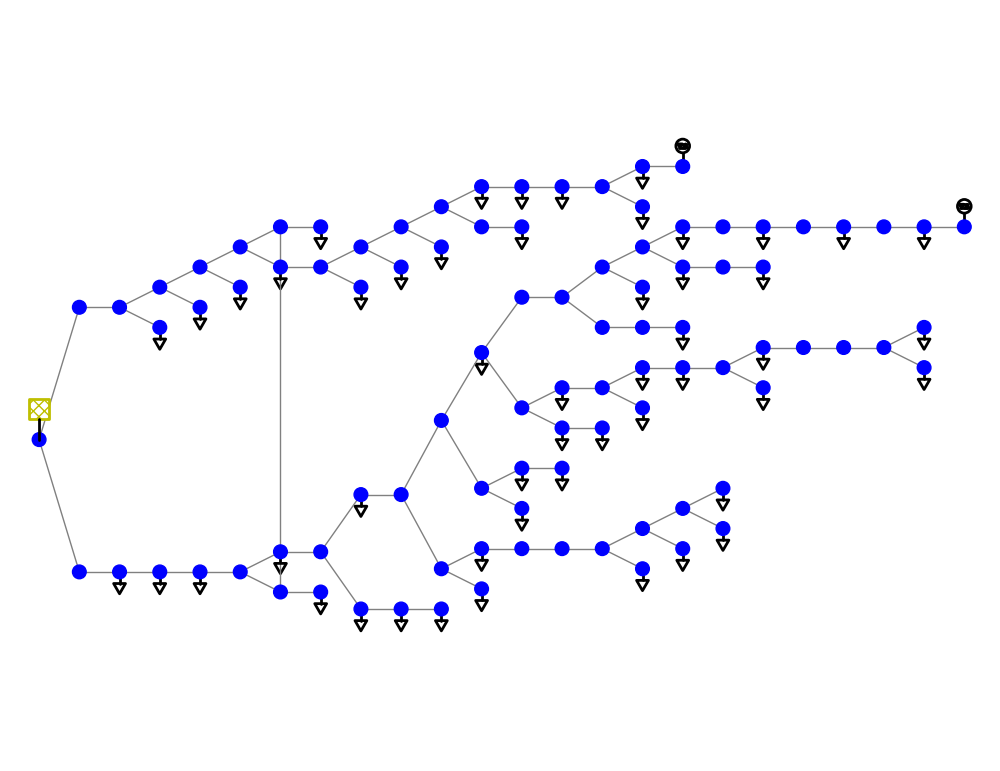

This pandapower network includes the following parameter tables:
   - bus (95 element)
   - load (51 element)
   - sgen (2 element)
   - ext_grid (1 elements)
   - line (95 element)
   - bus_geodata (95 element)


In [5]:
def Network_95_nodes_datav2():
    net = pp.create_empty_network(name="95bus_grid")
    pp.create_buses(net, 95, 11, min_vm_pu=0.95, max_vm_pu=1.05)
    pp.create_ext_grid(net, 0)
    idx = [2,5,7,9,11,13,15,17,20,21,22,23,25,26,29,31,33,34,35,37,38,39,40,43,44,48,50,52,53,56,57,58,59,61,62,63,65,66,67,69,70,74,75,80,82,84,86,87,89,91,93]
    P = [0.82092, 0.021915, 0.04569, 0.042075, 0.007305, 0.007305, 0.023535, 0.01974, 0.08631, 0.085875, 0.041655,
         0.0438, 0.02196, 0.679290434, 0.03948, 0.027465, 0.07245, 0.051105, 0.07777, 0.084075, 0.17601, 0.010995,
         0.01647, 0.047505, 0.15264, 0.021915, 0.02343, 0.07167, 0.08493, 0.011685, 0.01876, 0.010995, 0.041655,
         0.021915, 0.021915, 0.026745, 0.12681, 0.0438, 0.04101, 0.051105, 0.020445, 0.21266, 0.15078, 0.080385,
         0.0375, 0.12867, 0.14547, 0.068445, 0.199155, 0.08415, 0.07209]
    Q = [0.14346, 0.00312, 0.00651, 0.006, 0.001035, 0.001035, 0.00774, 0.00336, 0.014535, 0.012255, 0.00648, 0.00624,
         0.003135, 0.01005, 0.006735, 0.003915, 0.01143, 0.00729, 0.00648, 0.01799, 0.041745, 0.00156, 0.00234,
         0.006765, 0.029, 0.00312, 0.003885, 0.03451, 0.012945, 0.03111, 0.00186, 0.00156, 0.02432, 0.00312, 0.00312,
         0.00492, 0.02381, 0.00624, 0.015, 0.00729, 0.00594, 0.01181, 0.01473, 0.01764, 0.0075, 0.028455, 0.02184,
         0.015, 0.037275, 0.011985, 0.01194]
    pp.create_loads(net, idx, p_mw=P, q_mvar=Q)
    idx = [27, 94]
    P = [1.0125, 1.4625]
    Q = [-0.33285, -0.33285]
    pp.create_sgens(net, idx, P, Q)
    fbus = [0, 1, 0, 3, 4, 4, 6, 6, 8, 8, 10, 11, 12, 12, 14, 14, 16, 16, 18, 19,
          18, 21, 22, 23, 24, 24, 26, 10, 28, 28, 30, 30, 32, 33, 32, 35, 36, 37, 38, 36,
          40, 41, 42, 42, 44, 45, 46, 47, 47, 49, 49, 51, 51, 41, 54, 55, 55, 57, 54, 59,
          60, 61, 60, 63, 64, 64, 66, 67, 68, 68, 70, 71, 72, 73, 73, 59, 76, 77, 78, 79,
          77, 81, 81, 83, 84, 85, 83, 87, 88, 89, 90, 91, 92, 93, 2]
    tbus = list(range(1, 95))+[34]
    length_km = 1
    R = [0.05489, 0.03881, 0.04879, 0.09755, 0.17322, 0.21, 0.24251, 0.2586, 0.34645, 0.1293, 0.30169, 0.19395,
     0.17322, 0.23705, 0.20787, 0.2586, 0.13858, 0.1293, 0.1724, 0.10775, 0.2155, 0.19395, 0.30169, 0.09,
     0.13161, 0.36, 0.12, 0.295, 0.20787, 0.354, 0.24251, 0.27716, 0.2586, 0.3118, 0.11149, 0.34612, 0.15608,
     0.22298, 0.2135, 0.34479, 0.1293, 0.118, 0.20787, 0.236, 0.177, 0.09401, 0.177, 0.236, 0.354, 0.354,
     0.27716, 0.2135, 0.53374, 0.1724, 0.20787, 0.27716, 0.41574, 0.27716, 0.30169, 0.36517, 0.17322, 0.3118,
     0.14607, 0.25562, 0.20787, 0.18258, 0.29213, 0.25562, 0.09401, 0.4382, 0.2191, 0.07521, 0.14607, 0.29213,
     0.40168, 0.2586, 0.1293, 0.18258, 0.29213, 0.4382, 0.2155, 0.1293, 0.19395, 0.27716, 0.48502, 0.22621,
     0.2586, 0.06465, 0.27244, 0.16346, 0.0862, 0.15085, 0.27244, 0.49039, 0.50]
    X = [0.0569, 0.104, 0.05058, 0.33284, 0.07589, 0.203, 0.10624, 0.17673, 0.15178, 0.08836, 0.20618, 0.13255,
     0.07589, 0.172, 0.09107, 0.17673, 0.06071, 0.08836, 0.11782, 0.07364, 0.14727, 0.13255, 0.20618, 0.087,
     0.05033, 0.348, 0.116, 0.15, 0.09107, 0.18, 0.10624, 0.12142, 0.17673, 0.1366, 0.07376, 0.20653, 0.10326,
     0.14752, 0.09126, 0.23564, 0.08836, 0.06, 0.09107, 0.12, 0.09, 0.03595, 0.09, 0.12, 0.18, 0.18, 0.12142,
     0.09126, 0.22816, 0.11782, 0.09107, 0.12142, 0.18213, 0.12142, 0.20618, 0.15244, 0.07589, 0.1366, 0.06098,
     0.10671, 0.09107, 0.07622, 0.12195, 0.10671, 0.03595, 0.18293, 0.09146, 0.02876, 0.06098, 0.12195, 0.16768,
     0.17673, 0.08836, 0.07622, 0.12195, 0.17673, 0.14727, 0.08836, 0.13255, 0.12142, 0.21249, 0.04686, 0.17673,
     0.04418, 0.04012, 0.02407, 0.05891, 0.10309, 0.04012, 0.07222, 0.08]
    R = [k * 1.21 for k in R]
    X = [k * 1.21 for k in X]
    C = 0
    Imax = 0
    pp.create_lines_from_parameters(net, fbus, tbus, length_km, R, X, C, Imax)
    return net

net = Network_95_nodes_datav2()

simple_plot(net, plot_sgens=True, plot_loads=True)
print(net)

In [ ]:
%%time

import copy
import numpy as np
from tqdm import tqdm
import random


def generate_numbers(time_instants, n_bus):
    res = np.zeros((n_bus, time_instants))
    for i in range(n_bus):

        # Definizione dei parametri
        intervallo = np.arange(time_instants)
        frequenza = 0.02  # Regola la frequenza dell'andamento
        ampiezza = 1  # Regola l'ampiezza dell'andamento
        traslazione = 0.0  # Regola la traslazione verticale dell'andamento
        rumore = 0.2  # Regola la variazione casuale dell'andamento

        # Generazione dell'andamento
        andamento = ampiezza * np.sin(frequenza * intervallo) + traslazione
        andamento += rumore * np.random.normal(-1, 1, size=andamento.shape)
        res[i] = andamento
        #res[i][len(andamento)//2:] = 1

        '''
        plt.plot(intervallo, andamento)
        plt.xlabel('Tempo')
        plt.ylabel('Valore')
        plt.show()
        '''
    return res.T


# 600 timestep, ad ogni timestep i profili saranno aggiornati di un fattore moltiplicativo tra 0.5 e 1.5
original_p_values = copy.deepcopy(net.load.p_mw)
original_q_values = copy.deepcopy(net.load.q_mvar)
original_sgen_p = copy.deepcopy(net.sgen.p_mw)
original_sgen_q = copy.deepcopy(net.sgen.q_mvar)

load_profiles_p = generate_numbers(30000, len(net.load))
load_profiles_q = generate_numbers(30000, len(net.load))

pp.runpp(net)

res_p_mw = list([net.res_bus["p_mw"].values[1:]])
res_q_mvar = list([net.res_bus["q_mvar"].values[1:]])

v_bus_indices = [0, 3, 5, 10]
res_vm_pu = list([net.res_bus["vm_pu"].values[v_bus_indices]])

res_all_vm_pu = list([net.res_bus["vm_pu"].values])

# p_q_indices = [0, 3, 6, 10, 11, 13, 15]
p_q_indices = [0, 3, 6, 10, 11]
res_p_mw_lines = list([net.res_line["p_from_mw"].values[p_q_indices]])
res_q_mvar_lines = list([net.res_line["q_from_mvar"].values[p_q_indices]])

for p_factor, q_factor in tqdm(zip(load_profiles_p, load_profiles_q), total=30000):
    while True:
        try:

            net.ext_grid.at[0, 'vm_pu'] = random.uniform(0.95, 1.05)

            # aggiorno load di p e q
            for i in range(len(net.load.p_mw)):
                net.load.p_mw[i] = original_p_values[i] * abs(p_factor[i])
                net.load.q_mvar[i] = original_q_values[i] * abs(q_factor[i])

                #net.load.p_mw[i] = random.uniform(0.9, 1.1) * original_p_values[i]
                #net.load.q_mvar[i] = random.uniform(0.9, 1.1) * original_q_values[i]

            bias = (random.random() * 2 - 1) / 2.

            add_bias = (random.random() > .5) / 2.
            for i in range(len(net.sgen.p_mw)):
                if add_bias:
                    net.sgen.p_mw[i] = min(1., abs(bias + random.random())) * original_sgen_p[i]
                    net.sgen.q_mvar[i] = min(1., abs(bias + random.random())) * original_sgen_q[i]
                else:
                    net.sgen.p_mw[i] = random.random() * original_sgen_p[i]
                    net.sgen.q_mvar[i] = random.random() * original_sgen_q[i]
            pp.runpp(net, max_iteration=5000)
            break
        except:
            pass
    # for i in range(len(net.res_bus["vm_pu"].values)):
    #    pp.create_measurement(net, 'p', 'bus', net.res_bus["vm_pu"].values[i], 0.003, i)

    res_p_mw.append(net.res_bus["p_mw"].values[1:])
    res_q_mvar.append(net.res_bus["q_mvar"].values[1:])
    res_vm_pu.append(net.res_bus["vm_pu"].values[v_bus_indices])
    res_p_mw_lines.append(net.res_line['p_from_mw'].values[p_q_indices])
    res_q_mvar_lines.append(net.res_line['q_from_mvar'].values[p_q_indices])
    res_all_vm_pu.append(net.res_bus["vm_pu"].values)

# aggiungo rumore introdotto dallo strumento di misura
measured_p_mw = list(np.random.normal(res_p_mw, 0.003))
measured_q_mvar = list(np.random.normal(res_q_mvar, 0.003))
measured_vm_pu = list(np.random.normal(res_vm_pu, 0.003))
measured_all_vm_pu = list(np.random.normal(res_all_vm_pu, 0.003))
measured_p_mw_lines = list(np.random.normal(res_p_mw_lines, 0.003))
measured_q_mvar_lines = list(np.random.normal(res_q_mvar_lines, 0.003))

data_x = np.hstack((res_p_mw, res_q_mvar, res_vm_pu, res_p_mw_lines, res_q_mvar_lines))
measured_data_x = np.hstack(
    (measured_p_mw, measured_q_mvar, measured_vm_pu, measured_p_mw_lines, measured_q_mvar_lines))
data_y = res_all_vm_pu
measured_data_y = measured_all_vm_pu



np.save('./net_95_v2/data_x_alt.npy', data_x)
np.save('./net_95_v2/data_y_alt.npy', data_y)
np.save('./net_95_v2/measured_data_x_alt.npy', measured_data_x)
np.save('./net_95_v2/measured_data_y_alt.npy', measured_data_y)

In [ ]:
'''
CPU times: total: 40.4 s
Wall time: 3min 5s
'''

No or insufficient geodata available --> Creating artificial coordinates. This may take some time


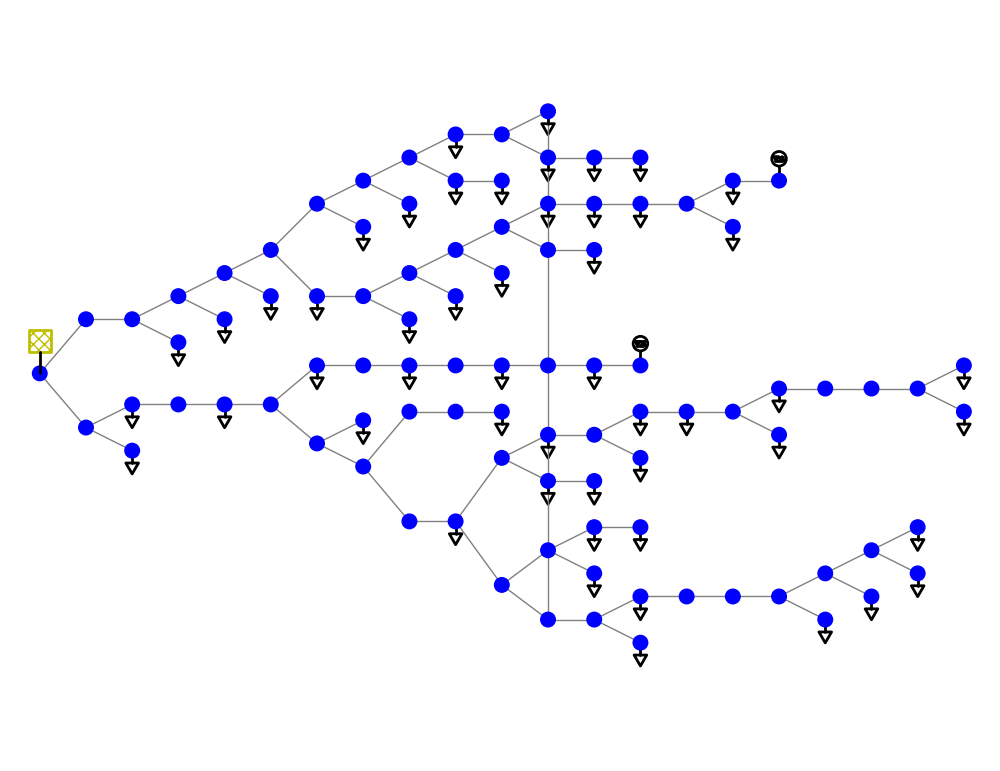

This pandapower network includes the following parameter tables:
   - bus (95 element)
   - load (51 element)
   - sgen (2 element)
   - ext_grid (1 elements)
   - line (95 element)
   - bus_geodata (95 element)


In [3]:
def Network_95_nodes_datav3():
    net = pp.create_empty_network(name="95bus_grid")
    pp.create_buses(net, 95, 11, min_vm_pu=0.95, max_vm_pu=1.05)
    pp.create_ext_grid(net, 0)
    idx = [2,5,7,9,11,13,15,17,20,21,22,23,25,26,29,31,33,34,35,37,38,39,40,43,44,48,50,52,53,56,57,58,59,61,62,63,65,66,67,69,70,74,75,80,82,84,86,87,89,91,93]
    P = [0.82092, 0.021915, 0.04569, 0.042075, 0.007305, 0.007305, 0.023535, 0.01974, 0.08631, 0.085875, 0.041655,
         0.0438, 0.02196, 0.679290434, 0.03948, 0.027465, 0.07245, 0.051105, 0.07777, 0.084075, 0.17601, 0.010995,
         0.01647, 0.047505, 0.15264, 0.021915, 0.02343, 0.07167, 0.08493, 0.011685, 0.01876, 0.010995, 0.041655,
         0.021915, 0.021915, 0.026745, 0.12681, 0.0438, 0.04101, 0.051105, 0.020445, 0.21266, 0.15078, 0.080385,
         0.0375, 0.12867, 0.14547, 0.068445, 0.199155, 0.08415, 0.07209]
    Q = [0.14346, 0.00312, 0.00651, 0.006, 0.001035, 0.001035, 0.00774, 0.00336, 0.014535, 0.012255, 0.00648, 0.00624,
         0.003135, 0.01005, 0.006735, 0.003915, 0.01143, 0.00729, 0.00648, 0.01799, 0.041745, 0.00156, 0.00234,
         0.006765, 0.029, 0.00312, 0.003885, 0.03451, 0.012945, 0.03111, 0.00186, 0.00156, 0.02432, 0.00312, 0.00312,
         0.00492, 0.02381, 0.00624, 0.015, 0.00729, 0.00594, 0.01181, 0.01473, 0.01764, 0.0075, 0.028455, 0.02184,
         0.015, 0.037275, 0.011985, 0.01194]
    pp.create_loads(net, idx, p_mw=P, q_mvar=Q)
    idx = [27, 94]
    P = [1.0125, 1.4625]
    Q = [-0.33285, -0.33285]
    pp.create_sgens(net, idx, P, Q)
    fbus = [0, 1, 0, 3, 4, 4, 6, 6, 8, 8, 10, 11, 12, 12, 14, 14, 16, 16, 18, 19,
          18, 21, 22, 23, 24, 24, 26, 10, 28, 28, 30, 30, 32, 33, 32, 35, 36, 37, 38, 36,
          40, 41, 42, 42, 44, 45, 46, 47, 47, 49, 49, 51, 51, 41, 54, 55, 55, 57, 54, 59,
          60, 61, 60, 63, 64, 64, 66, 67, 68, 68, 70, 71, 72, 73, 73, 59, 76, 77, 78, 79,
          77, 81, 81, 83, 84, 85, 83, 87, 88, 89, 90, 91, 92, 93, 1]
    tbus = list(range(1, 95))+[86]
    length_km = 1
    R = [0.05489, 0.03881, 0.04879, 0.09755, 0.17322, 0.21, 0.24251, 0.2586, 0.34645, 0.1293, 0.30169, 0.19395,
     0.17322, 0.23705, 0.20787, 0.2586, 0.13858, 0.1293, 0.1724, 0.10775, 0.2155, 0.19395, 0.30169, 0.09,
     0.13161, 0.36, 0.12, 0.295, 0.20787, 0.354, 0.24251, 0.27716, 0.2586, 0.3118, 0.11149, 0.34612, 0.15608,
     0.22298, 0.2135, 0.34479, 0.1293, 0.118, 0.20787, 0.236, 0.177, 0.09401, 0.177, 0.236, 0.354, 0.354,
     0.27716, 0.2135, 0.53374, 0.1724, 0.20787, 0.27716, 0.41574, 0.27716, 0.30169, 0.36517, 0.17322, 0.3118,
     0.14607, 0.25562, 0.20787, 0.18258, 0.29213, 0.25562, 0.09401, 0.4382, 0.2191, 0.07521, 0.14607, 0.29213,
     0.40168, 0.2586, 0.1293, 0.18258, 0.29213, 0.4382, 0.2155, 0.1293, 0.19395, 0.27716, 0.48502, 0.22621,
     0.2586, 0.06465, 0.27244, 0.16346, 0.0862, 0.15085, 0.27244, 0.49039, 0.50]
    X = [0.0569, 0.104, 0.05058, 0.33284, 0.07589, 0.203, 0.10624, 0.17673, 0.15178, 0.08836, 0.20618, 0.13255,
     0.07589, 0.172, 0.09107, 0.17673, 0.06071, 0.08836, 0.11782, 0.07364, 0.14727, 0.13255, 0.20618, 0.087,
     0.05033, 0.348, 0.116, 0.15, 0.09107, 0.18, 0.10624, 0.12142, 0.17673, 0.1366, 0.07376, 0.20653, 0.10326,
     0.14752, 0.09126, 0.23564, 0.08836, 0.06, 0.09107, 0.12, 0.09, 0.03595, 0.09, 0.12, 0.18, 0.18, 0.12142,
     0.09126, 0.22816, 0.11782, 0.09107, 0.12142, 0.18213, 0.12142, 0.20618, 0.15244, 0.07589, 0.1366, 0.06098,
     0.10671, 0.09107, 0.07622, 0.12195, 0.10671, 0.03595, 0.18293, 0.09146, 0.02876, 0.06098, 0.12195, 0.16768,
     0.17673, 0.08836, 0.07622, 0.12195, 0.17673, 0.14727, 0.08836, 0.13255, 0.12142, 0.21249, 0.04686, 0.17673,
     0.04418, 0.04012, 0.02407, 0.05891, 0.10309, 0.04012, 0.07222, 0.08]
    R = [k * 1.21 for k in R]
    X = [k * 1.21 for k in X]
    C = 0
    Imax = 0
    pp.create_lines_from_parameters(net, fbus, tbus, length_km, R, X, C, Imax)
    return net

net = Network_95_nodes_datav3()

simple_plot(net, plot_sgens=True, plot_loads=True)
print(net)

In [ ]:
%%time

import copy
import numpy as np
from tqdm import tqdm
import random


def generate_numbers(time_instants, n_bus):
    res = np.zeros((n_bus, time_instants))
    for i in range(n_bus):

        # Definizione dei parametri
        intervallo = np.arange(time_instants)
        frequenza = 0.02  # Regola la frequenza dell'andamento
        ampiezza = 1  # Regola l'ampiezza dell'andamento
        traslazione = 0.0  # Regola la traslazione verticale dell'andamento
        rumore = 0.2  # Regola la variazione casuale dell'andamento

        # Generazione dell'andamento
        andamento = ampiezza * np.sin(frequenza * intervallo) + traslazione
        andamento += rumore * np.random.normal(-1, 1, size=andamento.shape)
        res[i] = andamento
        #res[i][len(andamento)//2:] = 1

        '''
        plt.plot(intervallo, andamento)
        plt.xlabel('Tempo')
        plt.ylabel('Valore')
        plt.show()
        '''
    return res.T


# 600 timestep, ad ogni timestep i profili saranno aggiornati di un fattore moltiplicativo tra 0.5 e 1.5
original_p_values = copy.deepcopy(net.load.p_mw)
original_q_values = copy.deepcopy(net.load.q_mvar)
original_sgen_p = copy.deepcopy(net.sgen.p_mw)
original_sgen_q = copy.deepcopy(net.sgen.q_mvar)


load_profiles_p = generate_numbers(30000, len(net.load))
load_profiles_q = generate_numbers(30000, len(net.load))

pp.runpp(net)

res_p_mw = list([net.res_bus["p_mw"].values[1:]])
res_q_mvar = list([net.res_bus["q_mvar"].values[1:]])

v_bus_indices = [0, 3, 5, 10, 12]
res_vm_pu = list([net.res_bus["vm_pu"].values[v_bus_indices]])

res_all_vm_pu = list([net.res_bus["vm_pu"].values])

# p_q_indices = [0, 3, 6, 10, 11, 13, 15]
p_q_indices = [0, 3, 6, 10, 12]
res_p_mw_lines = list([net.res_line["p_from_mw"].values[p_q_indices]])
res_q_mvar_lines = list([net.res_line["q_from_mvar"].values[p_q_indices]])

for p_factor, q_factor in tqdm(zip(load_profiles_p, load_profiles_q), total=30000):
    while True:
        try:

            net.ext_grid.at[0, 'vm_pu'] = random.uniform(0.95, 1.05)

            # aggiorno load di p e q
            for i in range(len(net.load.p_mw)):
                net.load.p_mw[i] = original_p_values[i] * abs(p_factor[i])
                net.load.q_mvar[i] = original_q_values[i] * abs(q_factor[i])

                #net.load.p_mw[i] = random.uniform(0.9, 1.1) * original_p_values[i]
                #net.load.q_mvar[i] = random.uniform(0.9, 1.1) * original_q_values[i]

            bias = (random.random() * 2 - 1) / 2.

            add_bias = (random.random() > .5) / 2.
            for i in range(len(net.sgen.p_mw)):
                if add_bias:
                    net.sgen.p_mw[i] = min(1., abs(bias + random.random())) * original_sgen_p[i]
                    net.sgen.q_mvar[i] = min(1., abs(bias + random.random())) * original_sgen_q[i]
                else:
                    net.sgen.p_mw[i] = random.random() * original_sgen_p[i]
                    net.sgen.q_mvar[i] = random.random() * original_sgen_q[i]

            pp.runpp(net, max_iteration=5000)
            break
        except:
            pass
    # for i in range(len(net.res_bus["vm_pu"].values)):
    #    pp.create_measurement(net, 'p', 'bus', net.res_bus["vm_pu"].values[i], 0.003, i)

    res_p_mw.append(net.res_bus["p_mw"].values[1:])
    res_q_mvar.append(net.res_bus["q_mvar"].values[1:])
    res_vm_pu.append(net.res_bus["vm_pu"].values[v_bus_indices])
    res_p_mw_lines.append(net.res_line['p_from_mw'].values[p_q_indices])
    res_q_mvar_lines.append(net.res_line['q_from_mvar'].values[p_q_indices])
    res_all_vm_pu.append(net.res_bus["vm_pu"].values)

# aggiungo rumore introdotto dallo strumento di misura
measured_p_mw = list(np.random.normal(res_p_mw, 0.003))
measured_q_mvar = list(np.random.normal(res_q_mvar, 0.003))
measured_vm_pu = list(np.random.normal(res_vm_pu, 0.003))
measured_all_vm_pu = list(np.random.normal(res_all_vm_pu, 0.003))
measured_p_mw_lines = list(np.random.normal(res_p_mw_lines, 0.003))
measured_q_mvar_lines = list(np.random.normal(res_q_mvar_lines, 0.003))

data_x = np.hstack((res_p_mw, res_q_mvar, res_vm_pu, res_p_mw_lines, res_q_mvar_lines))
measured_data_x = np.hstack(
    (measured_p_mw, measured_q_mvar, measured_vm_pu, measured_p_mw_lines, measured_q_mvar_lines))
data_y = res_all_vm_pu
measured_data_y = measured_all_vm_pu



np.save('./net_95_v3/data_x_alt.npy', data_x)
np.save('./net_95_v3/data_y_alt.npy', data_y)
np.save('./net_95_v3/measured_data_x_alt.npy', measured_data_x)
np.save('./net_95_v3/measured_data_y_alt.npy', measured_data_y)

In [ ]:
'''
CPU times: total: 44.5 s
Wall time: 2min 52s
'''

No or insufficient geodata available --> Creating artificial coordinates. This may take some time


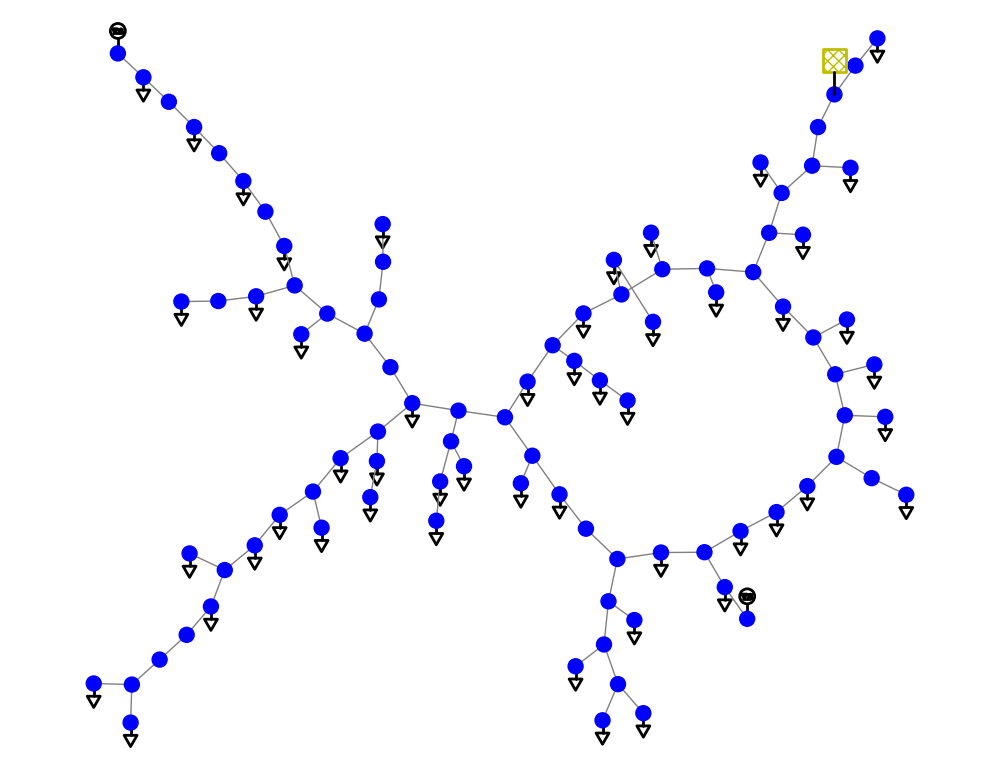

This pandapower network includes the following parameter tables:
   - bus (95 element)
   - load (51 element)
   - sgen (2 element)
   - ext_grid (1 elements)
   - line (95 element)
   - bus_geodata (95 element)


In [4]:
def Network_95_nodes_datav4():
    net = pp.create_empty_network(name="95bus_grid")
    pp.create_buses(net, 95, 11, min_vm_pu=0.95, max_vm_pu=1.05)
    pp.create_ext_grid(net, 0)
    idx = [2,5,7,9,11,13,15,17,20,21,22,23,25,26,29,31,33,34,35,37,38,39,40,43,44,48,50,52,53,56,57,58,59,61,62,63,65,66,67,69,70,74,75,80,82,84,86,87,89,91,93]
    P = [0.82092, 0.021915, 0.04569, 0.042075, 0.007305, 0.007305, 0.023535, 0.01974, 0.08631, 0.085875, 0.041655,
         0.0438, 0.02196, 0.679290434, 0.03948, 0.027465, 0.07245, 0.051105, 0.07777, 0.084075, 0.17601, 0.010995,
         0.01647, 0.047505, 0.15264, 0.021915, 0.02343, 0.07167, 0.08493, 0.011685, 0.01876, 0.010995, 0.041655,
         0.021915, 0.021915, 0.026745, 0.12681, 0.0438, 0.04101, 0.051105, 0.020445, 0.21266, 0.15078, 0.080385,
         0.0375, 0.12867, 0.14547, 0.068445, 0.199155, 0.08415, 0.07209]
    Q = [0.14346, 0.00312, 0.00651, 0.006, 0.001035, 0.001035, 0.00774, 0.00336, 0.014535, 0.012255, 0.00648, 0.00624,
         0.003135, 0.01005, 0.006735, 0.003915, 0.01143, 0.00729, 0.00648, 0.01799, 0.041745, 0.00156, 0.00234,
         0.006765, 0.029, 0.00312, 0.003885, 0.03451, 0.012945, 0.03111, 0.00186, 0.00156, 0.02432, 0.00312, 0.00312,
         0.00492, 0.02381, 0.00624, 0.015, 0.00729, 0.00594, 0.01181, 0.01473, 0.01764, 0.0075, 0.028455, 0.02184,
         0.015, 0.037275, 0.011985, 0.01194]
    pp.create_loads(net, idx, p_mw=P, q_mvar=Q)
    idx = [27, 94]
    P = [1.0125, 1.4625]
    Q = [-0.33285, -0.33285]
    pp.create_sgens(net, idx, P, Q)
    fbus = [0, 1, 0, 3, 4, 4, 6, 6, 8, 8, 10, 11, 12, 12, 14, 14, 16, 16, 18, 19,
          18, 21, 22, 23, 24, 24, 26, 10, 28, 28, 30, 30, 32, 33, 32, 35, 36, 37, 38, 36,
          40, 41, 42, 42, 44, 45, 46, 47, 47, 49, 49, 51, 51, 41, 54, 55, 55, 57, 54, 59,
          60, 61, 60, 63, 64, 64, 66, 67, 68, 68, 70, 71, 72, 73, 73, 59, 76, 77, 78, 79,
          77, 81, 81, 83, 84, 85, 83, 87, 88, 89, 90, 91, 92, 93, 25]
    tbus = list(range(1, 95))+[46]
    length_km = 1
    R = [0.05489, 0.03881, 0.04879, 0.09755, 0.17322, 0.21, 0.24251, 0.2586, 0.34645, 0.1293, 0.30169, 0.19395,
     0.17322, 0.23705, 0.20787, 0.2586, 0.13858, 0.1293, 0.1724, 0.10775, 0.2155, 0.19395, 0.30169, 0.09,
     0.13161, 0.36, 0.12, 0.295, 0.20787, 0.354, 0.24251, 0.27716, 0.2586, 0.3118, 0.11149, 0.34612, 0.15608,
     0.22298, 0.2135, 0.34479, 0.1293, 0.118, 0.20787, 0.236, 0.177, 0.09401, 0.177, 0.236, 0.354, 0.354,
     0.27716, 0.2135, 0.53374, 0.1724, 0.20787, 0.27716, 0.41574, 0.27716, 0.30169, 0.36517, 0.17322, 0.3118,
     0.14607, 0.25562, 0.20787, 0.18258, 0.29213, 0.25562, 0.09401, 0.4382, 0.2191, 0.07521, 0.14607, 0.29213,
     0.40168, 0.2586, 0.1293, 0.18258, 0.29213, 0.4382, 0.2155, 0.1293, 0.19395, 0.27716, 0.48502, 0.22621,
     0.2586, 0.06465, 0.27244, 0.16346, 0.0862, 0.15085, 0.27244, 0.49039, 0.50]
    X = [0.0569, 0.104, 0.05058, 0.33284, 0.07589, 0.203, 0.10624, 0.17673, 0.15178, 0.08836, 0.20618, 0.13255,
     0.07589, 0.172, 0.09107, 0.17673, 0.06071, 0.08836, 0.11782, 0.07364, 0.14727, 0.13255, 0.20618, 0.087,
     0.05033, 0.348, 0.116, 0.15, 0.09107, 0.18, 0.10624, 0.12142, 0.17673, 0.1366, 0.07376, 0.20653, 0.10326,
     0.14752, 0.09126, 0.23564, 0.08836, 0.06, 0.09107, 0.12, 0.09, 0.03595, 0.09, 0.12, 0.18, 0.18, 0.12142,
     0.09126, 0.22816, 0.11782, 0.09107, 0.12142, 0.18213, 0.12142, 0.20618, 0.15244, 0.07589, 0.1366, 0.06098,
     0.10671, 0.09107, 0.07622, 0.12195, 0.10671, 0.03595, 0.18293, 0.09146, 0.02876, 0.06098, 0.12195, 0.16768,
     0.17673, 0.08836, 0.07622, 0.12195, 0.17673, 0.14727, 0.08836, 0.13255, 0.12142, 0.21249, 0.04686, 0.17673,
     0.04418, 0.04012, 0.02407, 0.05891, 0.10309, 0.04012, 0.07222, 0.08]
    R = [k * 1.21 for k in R]
    X = [k * 1.21 for k in X]
    C = 0
    Imax = 0
    pp.create_lines_from_parameters(net, fbus, tbus, length_km, R, X, C, Imax)
    return net


net = Network_95_nodes_datav4()

simple_plot(net, plot_sgens=True, plot_loads=True)
print(net)

In [ ]:
%%time

import copy
import numpy as np
from tqdm import tqdm
import random


def generate_numbers(time_instants, n_bus):
    res = np.zeros((n_bus, time_instants))
    for i in range(n_bus):

        # Definizione dei parametri
        intervallo = np.arange(time_instants)
        frequenza = 0.02  # Regola la frequenza dell'andamento
        ampiezza = 1  # Regola l'ampiezza dell'andamento
        traslazione = 0.0  # Regola la traslazione verticale dell'andamento
        rumore = 0.2  # Regola la variazione casuale dell'andamento

        # Generazione dell'andamento
        andamento = ampiezza * np.sin(frequenza * intervallo) + traslazione
        andamento += rumore * np.random.normal(-1, 1, size=andamento.shape)
        res[i] = andamento
        #res[i][len(andamento)//2:] = 1

        '''
        plt.plot(intervallo, andamento)
        plt.xlabel('Tempo')
        plt.ylabel('Valore')
        plt.show()
        '''
    return res.T


# 600 timestep, ad ogni timestep i profili saranno aggiornati di un fattore moltiplicativo tra 0.5 e 1.5
original_p_values = copy.deepcopy(net.load.p_mw)
original_q_values = copy.deepcopy(net.load.q_mvar)
original_sgen_p = copy.deepcopy(net.sgen.p_mw)
original_sgen_q = copy.deepcopy(net.sgen.q_mvar)


load_profiles_p = generate_numbers(30000, len(net.load))
load_profiles_q = generate_numbers(30000, len(net.load))

pp.runpp(net)

res_p_mw = list([net.res_bus["p_mw"].values[1:]])
res_q_mvar = list([net.res_bus["q_mvar"].values[1:]])

v_bus_indices = [0, 3, 5, 10, 15]
res_vm_pu = list([net.res_bus["vm_pu"].values[v_bus_indices]])

res_all_vm_pu = list([net.res_bus["vm_pu"].values])

# p_q_indices = [0, 3, 6, 10, 11, 13, 15]
p_q_indices = [0, 3, 6, 10, 11, 13, 15]
res_p_mw_lines = list([net.res_line["p_from_mw"].values[p_q_indices]])
res_q_mvar_lines = list([net.res_line["q_from_mvar"].values[p_q_indices]])
for p_factor, q_factor in tqdm(zip(load_profiles_p, load_profiles_q), total=30000):
    while True:
        try:

            net.ext_grid.at[0, 'vm_pu'] = random.uniform(0.95, 1.05)

            # aggiorno load di p e q
            for i in range(len(net.load.p_mw)):
                net.load.p_mw[i] = original_p_values[i] * abs(p_factor[i])
                net.load.q_mvar[i] = original_q_values[i] * abs(q_factor[i])

                #net.load.p_mw[i] = random.uniform(0.9, 1.1) * original_p_values[i]
                #net.load.q_mvar[i] = random.uniform(0.9, 1.1) * original_q_values[i]

            bias = (random.random() * 2 - 1) / 2.

            add_bias = (random.random() > .5) / 2.
            for i in range(len(net.sgen.p_mw)):
                if add_bias:
                    net.sgen.p_mw[i] = min(1., abs(bias + random.random())) * original_sgen_p[i]
                    net.sgen.q_mvar[i] = min(1., abs(bias + random.random())) * original_sgen_q[i]
                else:
                    net.sgen.p_mw[i] = random.random() * original_sgen_p[i]
                    net.sgen.q_mvar[i] = random.random() * original_sgen_q[i]
            pp.runpp(net)
            break
        except:
            pass
    # for i in range(len(net.res_bus["vm_pu"].values)):
    #    pp.create_measurement(net, 'p', 'bus', net.res_bus["vm_pu"].values[i], 0.003, i)
    
    res_p_mw.append(net.res_bus["p_mw"].values[1:])
    res_q_mvar.append(net.res_bus["q_mvar"].values[1:])
    res_vm_pu.append(net.res_bus["vm_pu"].values[v_bus_indices])
    res_p_mw_lines.append(net.res_line['p_from_mw'].values[p_q_indices])
    res_q_mvar_lines.append(net.res_line['q_from_mvar'].values[p_q_indices])
    res_all_vm_pu.append(net.res_bus["vm_pu"].values)

# aggiungo rumore introdotto dallo strumento di misura
measured_p_mw = list(np.random.normal(res_p_mw, 0.003))
measured_q_mvar = list(np.random.normal(res_q_mvar, 0.003))
measured_vm_pu = list(np.random.normal(res_vm_pu, 0.003))
measured_all_vm_pu = list(np.random.normal(res_all_vm_pu, 0.003))
measured_p_mw_lines = list(np.random.normal(res_p_mw_lines, 0.003))
measured_q_mvar_lines = list(np.random.normal(res_q_mvar_lines, 0.003))

data_x = np.hstack((res_p_mw, res_q_mvar, res_vm_pu, res_p_mw_lines, res_q_mvar_lines))
measured_data_x = np.hstack(
    (measured_p_mw, measured_q_mvar, measured_vm_pu, measured_p_mw_lines, measured_q_mvar_lines))
data_y = res_all_vm_pu
measured_data_y = measured_all_vm_pu



np.save('./net_95_v4/data_x_alt.npy', data_x)
np.save('./net_95_v4/data_y_alt.npy', data_y)
np.save('./net_95_v4/measured_data_x_alt.npy', measured_data_x)
np.save('./net_95_v4/measured_data_y_alt.npy', measured_data_y)

In [ ]:
# v4
#CPU times: total: 1min 5s
#Wall time: 5min 32s

In [6]:
%%time

def generate_numbers(time_instants, n_bus):
    res = np.zeros((n_bus, time_instants))
    for i in range(n_bus):

        # Definizione dei parametri
        intervallo = np.arange(time_instants)
        frequenza = 0.02  # Regola la frequenza dell'andamento
        ampiezza = 1  # Regola l'ampiezza dell'andamento
        traslazione = 0.0  # Regola la traslazione verticale dell'andamento
        rumore = 0.2  # Regola la variazione casuale dell'andamento

        # Generazione dell'andamento
        andamento = ampiezza * np.sin(frequenza * intervallo) + traslazione
        andamento += rumore * np.random.normal(-1, 1, size=andamento.shape)
        res[i] = andamento
        #res[i][len(andamento)//2:] = 1

        '''
        plt.plot(intervallo, andamento)
        plt.xlabel('Tempo')
        plt.ylabel('Valore')
        plt.show()
        '''
    return res.T


# 600 timestep, ad ogni timestep i profili saranno aggiornati di un fattore moltiplicativo tra 0.5 e 1.5
original_p_values = copy.deepcopy(net.load.p_mw)
original_q_values = copy.deepcopy(net.load.q_mvar)
original_sgen_p = copy.deepcopy(net.sgen.p_mw)
original_sgen_q = copy.deepcopy(net.sgen.q_mvar)



original_sgen_p

CPU times: total: 0 ns
Wall time: 998 µs


0    1.0125
1    1.4625
Name: p_mw, dtype: float64

In [5]:
pp.runpp(net)
